In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon as jsd
from figaro.cosmology import CosmologicalParameters
from figaro.load import _find_redshift, load_density

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

## Function Definitions

In [3]:
# Mass distributions
def mean(DL, dMdDL = 30./1000., offset = 5.):
    return DL*dMdDL + offset

def std(DL, dMdDL = 8./1000., offset = 1.):
    return DL*dMdDL + offset

def PLpeak(m, alpha = -2., mmin = 5., mmax = 70., mu = 30., sigma = 4., w = 0.2):
    norm_pl = (1-alpha)/(mmin**(alpha+1) - mmax**(alpha+1))
    pl      = norm_pl * m**alpha
    peak    = np.exp(-0.5*((m-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
    return w*pl + (1-w)*peak

def evolving_gaussian(m, DL):
    mu = mean(DL)
    sigma = std(DL)
    return np.exp(-0.5*((m-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

# DL distributions
def DLsq(DL, DLmax = 5000):
    return 3*DL**2/DLmax**3

def gaussian(DL, mu = 1600, sigma = 400):
    return np.exp(-0.5*((DL-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

In [4]:
def luminosity_distance_to_redshift(distance, H0s):
    return np.array([_find_redshift(CosmologicalParameters(H0/100, 0.315, 0.685, -1, 0), distance) for H0 in H0s])

## Source Frame Distributions
Double Gaussian:
$$p(M, d_L) = p(M|d_L)p(d_L) = \mathrm{evolving\_gaussian}(M, d_L)*\mathrm{gaussian}(d_L)$$

Realistic Model:
$$p(M, d_L) = p(M)p(d_L) = \mathrm{PLpeak}(M)*\mathrm{DLsq}(d_L)$$

In [5]:
m = np.linspace(10,200,1000).reshape(-1,1)
dL = np.linspace(10,5000,100)

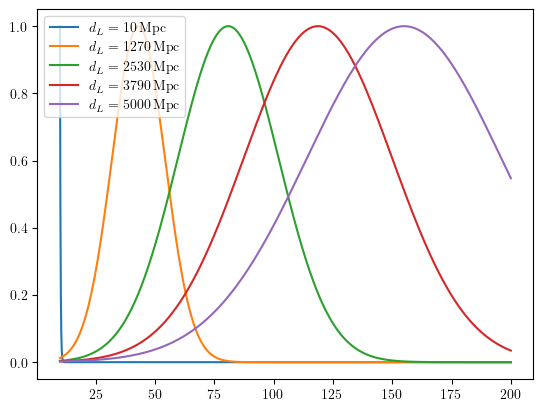

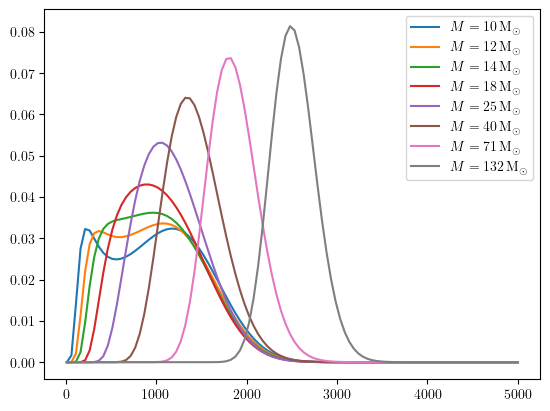

In [6]:
for i in [0,25,50,75,99]:
    prop = np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[:,i]
    y = prop/np.max(prop)
    plt.plot(m, y, label = "$d_L = "+str(f'{dL[i]:.0f}')+"\,\mathrm{Mpc}$")
plt.legend()
plt.show()

for i in [0,10,20,40,80,160,320,640]:
    prop = np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[i,:]
    y = prop/np.sum(prop)
    plt.plot(dL, y, label = "$M = "+str(f'{m[i,0]:.0f}')+"\,\mathrm{M}_\odot$")
plt.legend()
plt.show()

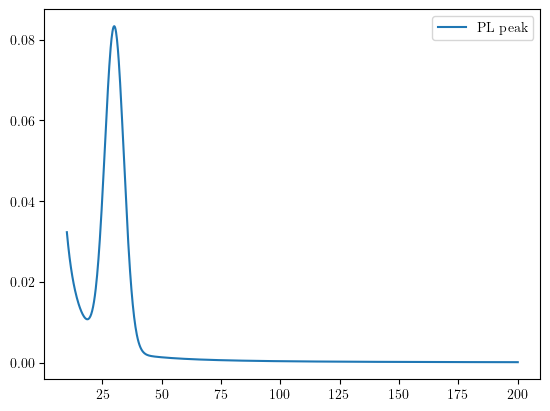

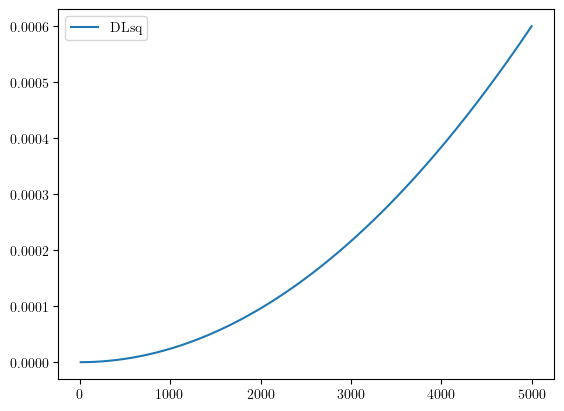

In [7]:
plt.plot(m, PLpeak(m), label = "PL peak")
plt.legend()
plt.show()
plt.plot(dL, DLsq(dL), label = "DLsq")
plt.legend()
plt.show()

## Detector Frame Distributions
Double Gaussian:
$$p(M_z, d_L) = \frac{1}{1+z(d_L, \Omega)}\,\mathrm{evolving\_gaussian}\left(\frac{M_z}{1+z(d_L, \Omega)}, d_L\right)\,\mathrm{gaussian}(d_L)$$

Realistic Model:
$$p(M_z, d_L) = \frac{1}{1+z(d_L, \Omega)}\,\mathrm{PLpeak}\left(\frac{M_z}{1+z(d_L, \Omega)}\right)\,\mathrm{DLsq}(d_L)$$

In [8]:
mz = np.linspace(10,200,1000)
dL = np.linspace(10,5000,100)

H0 = np.linspace(50,100,50)

z = luminosity_distance_to_redshift(dL, H0)

m = np.einsum("i, jk -> ikj", mz, np.reciprocal(1+z))

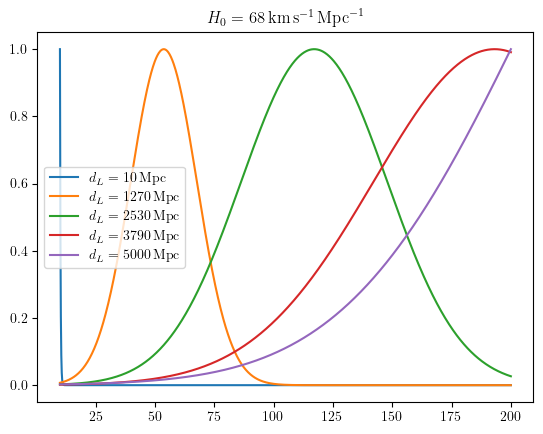

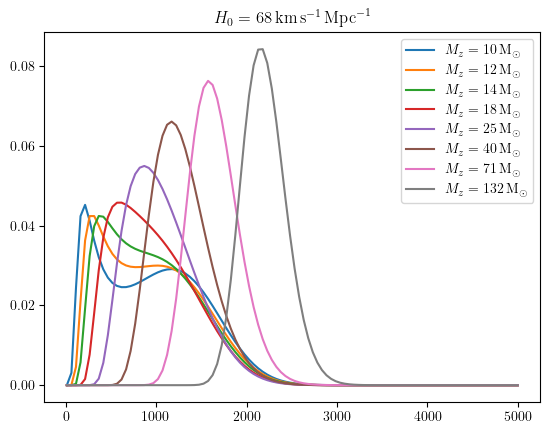

In [9]:
for i in [0,25,50,75,99]:
    prop = np.einsum("ijk, j -> ijk", evolving_gaussian(m, dL.reshape(-1,1)), gaussian(dL))[:,i,18]
    y = prop/np.max(prop)
    plt.plot(mz, y, label = "$d_L = "+str(f'{dL[i]:.0f}')+"\,\mathrm{Mpc}$")
plt.title("$H_0 = "+str(f'{H0[18]:.0f}')+"\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$")
plt.legend()
plt.show()

for i in [0,10,20,40,80,160,320,640]:
    prop = np.einsum("ijk, j -> ijk", evolving_gaussian(m, dL.reshape(-1,1)), gaussian(dL))[i,:,18]
    y = prop/np.sum(prop)
    plt.plot(dL, y, label = "$M_z = "+str(f'{mz[i]:.0f}')+"\,\mathrm{M}_\odot$")
plt.title("$H_0 = "+str(f'{H0[18]:.0f}')+"\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$")
plt.legend()
plt.show()

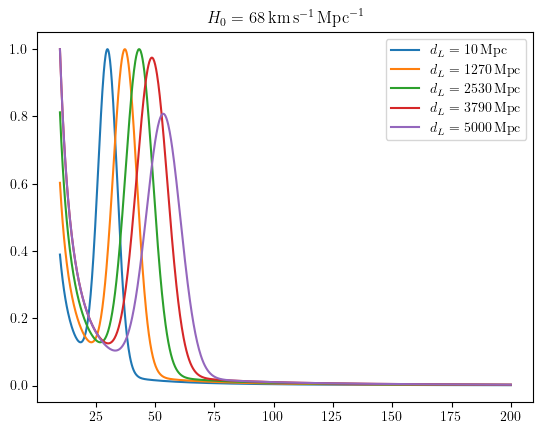

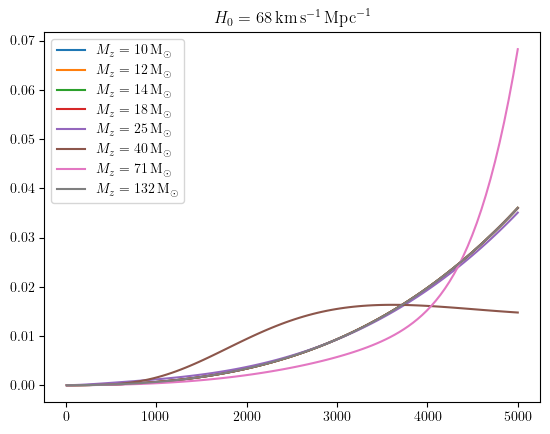

In [10]:
for i in [0,25,50,75,99]:
    prop = np.einsum("ijk, j -> ijk", PLpeak(m), DLsq(dL))[:,i,18]
    y = prop/np.max(prop)
    plt.plot(mz, y, label = "$d_L = "+str(f'{dL[i]:.0f}')+"\,\mathrm{Mpc}$")
plt.title("$H_0 = "+str(f'{H0[18]:.0f}')+"\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$")
plt.legend()
plt.show()

for i in [0,10,20,40,80,160,320,640]:
    prop = np.einsum("ijk, j -> ijk", PLpeak(m), DLsq(dL))[i,:,18]
    y = prop/np.sum(prop)
    plt.plot(dL, y, label = "$M_z = "+str(f'{mz[i]:.0f}')+"\,\mathrm{M}_\odot$")
plt.title("$H_0 = "+str(f'{H0[18]:.0f}')+"\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$")
plt.legend()
plt.show()

## Infer $H_0$

In [11]:
mz = np.linspace(10,200,1000)
dL = np.linspace(10,5000,500)

H0 = np.linspace(10,100,500)

z = luminosity_distance_to_redshift(dL, H0)

m = np.einsum("i, jk -> ikj", mz, np.reciprocal(1+z))

In [12]:
p_double_gaussian = np.trapz(np.einsum("ijk, j -> ijk", evolving_gaussian(m, dL.reshape(-1,1)), gaussian(dL)), dL, axis=1)
p_double_gaussian = p_double_gaussian/np.trapz(p_double_gaussian, mz, axis=0)

p_realistic = np.trapz(np.einsum("ijk, j -> ijk", PLpeak(m), DLsq(dL)), dL, axis=1)
p_realistic = p_realistic/np.trapz(p_realistic, mz, axis=0)

### Testing Plots

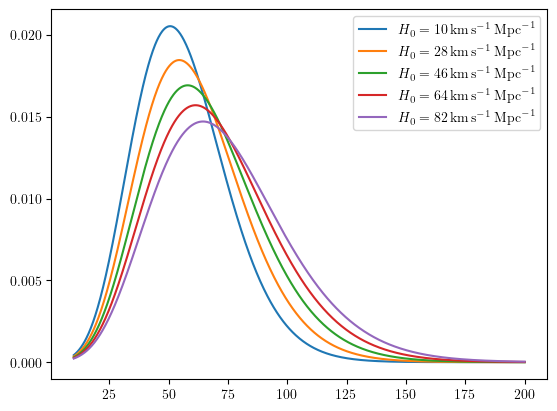

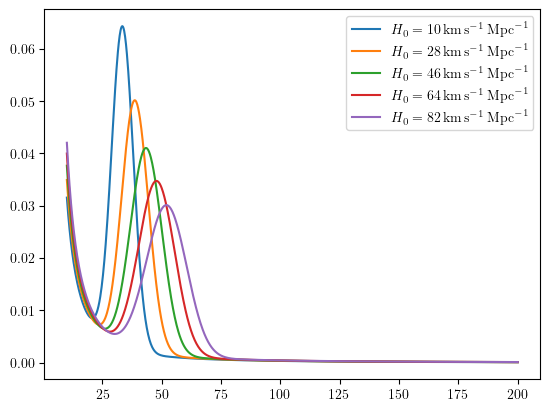

In [13]:
for i in [0,100,200,300,400]:
    prop = p_double_gaussian[:,i]
    plt.plot(mz, prop, label = "$H_0 = "+str(f'{H0[i]:.0f}')+"\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$")
plt.legend()
plt.show()
for i in [0,100,200,300,400]:
    prop = p_realistic[:,i]
    plt.plot(mz, prop, label = "$H_0 = "+str(f'{H0[i]:.0f}')+"\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$")
plt.legend()
plt.show()

### Estimating with Median Distribution Only

#### Squared Distance

In [14]:
double_gaussian_figaro = np.loadtxt("/Users/thomas.ng/Documents/GitHub/population_analysis/H0_test/double_gaussian/prob_density.txt")
realistic_figaro = np.loadtxt("/Users/thomas.ng/Documents/GitHub/population_analysis/H0_test/realistic/prob_density.txt")

In [15]:
double_gaussian_error = np.sum(np.square(p_double_gaussian - np.full((len(H0), len(mz)), np.interp(mz, double_gaussian_figaro[:,0], double_gaussian_figaro[:,1])).T), axis=0)
realistic_error = np.sum(np.square(p_realistic - np.full((len(H0), len(mz)), np.interp(mz, realistic_figaro[:,0], realistic_figaro[:,1])).T), axis=0)

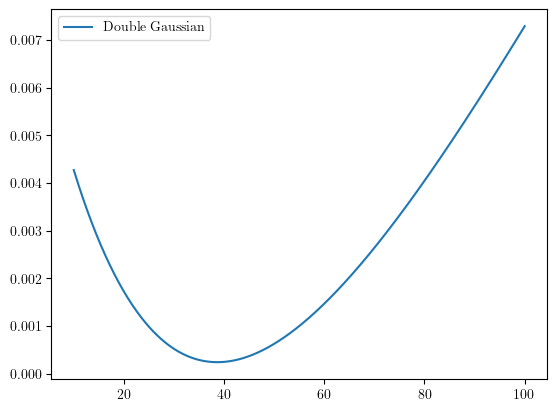

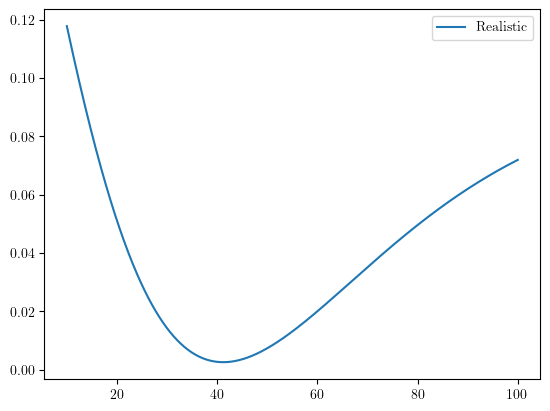

In [16]:
plt.plot(H0, double_gaussian_error, label = "Double Gaussian")
plt.legend()
plt.show()

plt.plot(H0, realistic_error, label = "Realistic")
plt.legend()
plt.show()

In [17]:
H0_double_gaussian = H0[np.argmin(double_gaussian_error)]
H0_realistic = H0[np.argmin(realistic_error)]

In [18]:
H0_double_gaussian, H0_realistic

(38.677354709418836, 41.20240480961924)

#### Jensen-Shannon Distance

In [19]:
double_gaussian_figaro = np.loadtxt("/Users/thomas.ng/Documents/GitHub/population_analysis/H0_test/double_gaussian/prob_density.txt")
realistic_figaro = np.loadtxt("/Users/thomas.ng/Documents/GitHub/population_analysis/H0_test/realistic/prob_density.txt")

In [20]:
double_gaussian_jsd = jsd(p_double_gaussian, np.full((len(H0), len(mz)), np.interp(mz, double_gaussian_figaro[:,0], double_gaussian_figaro[:,1])).T)
realistic_jsd = jsd(p_realistic, np.full((len(H0), len(mz)), np.interp(mz, realistic_figaro[:,0], realistic_figaro[:,1])).T)

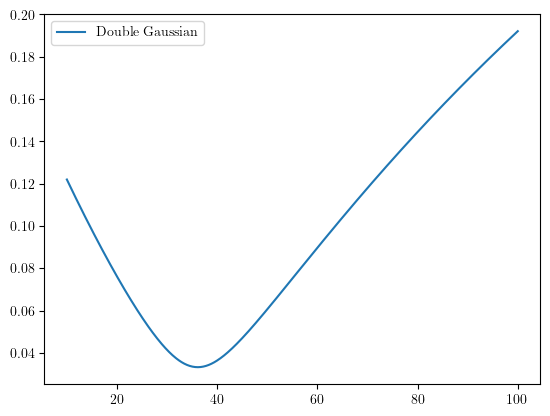

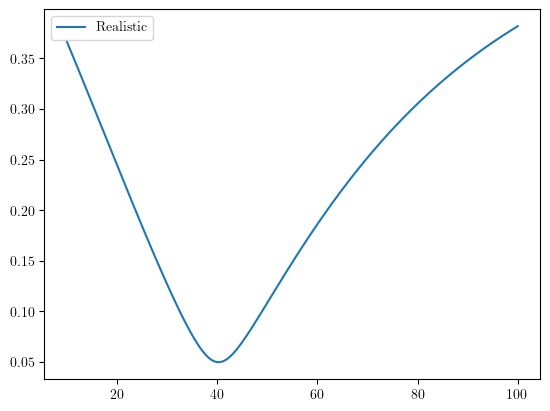

In [21]:
plt.plot(H0, double_gaussian_jsd, label = "Double Gaussian")
plt.legend()
plt.show()

plt.plot(H0, realistic_jsd, label = "Realistic")
plt.legend()
plt.show()

In [22]:
H0_double_gaussian = H0[np.argmin(double_gaussian_jsd)]
H0_realistic = H0[np.argmin(realistic_jsd)]

In [23]:
H0_double_gaussian, H0_realistic

(36.15230460921844, 40.30060120240481)

### Estimating $H_0$ with All Distributions

In [24]:
double_gaussian_figaro = load_density("/Users/thomas.ng/Documents/GitHub/population_analysis/H0_test/double_gaussian/density.pkl")
realistic_figaro = load_density("/Users/thomas.ng/Documents/GitHub/population_analysis/H0_test/realistic/density.pkl")

In [25]:
double_gaussian_figaro = np.array([double_gaussian_figaro[i].pdf(mz) for i in range(len(double_gaussian_figaro))])
realistic_figaro = np.array([realistic_figaro[i].pdf(mz) for i in range(len(realistic_figaro))])

In [26]:
double_gaussian_jsd = np.array([jsd(p_double_gaussian, np.full((len(H0), len(mz)), double_gaussian_figaro[i]).T) for i in range(len(double_gaussian_figaro))])
realistic_jsd = np.array([jsd(p_realistic, np.full((len(H0), len(mz)), realistic_figaro[i]).T) for i in range(len(realistic_figaro))])

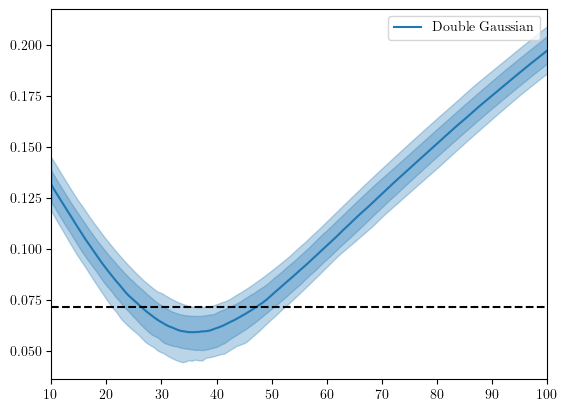

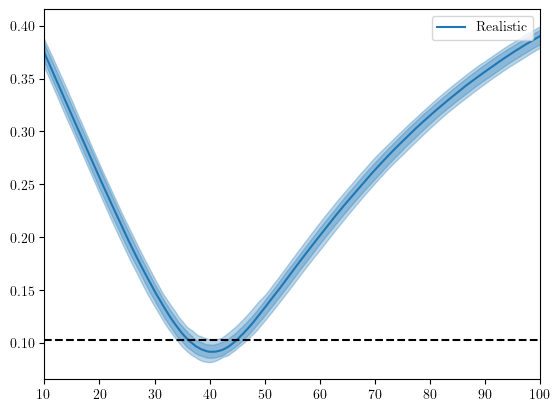

In [37]:
percs_double_gaussian = np.percentile(double_gaussian_jsd, [5, 16, 50, 84, 95], axis=0)
plt.fill_between(H0, percs_double_gaussian[0], percs_double_gaussian[-1], alpha=0.3, color='C0')
plt.fill_between(H0, percs_double_gaussian[1], percs_double_gaussian[-2], alpha=0.3, color='C0')
plt.plot(H0, percs_double_gaussian[2], label='Double Gaussian', color='C0')
plt.axhline(percs_double_gaussian[4].min(), color='k', linestyle='--')
plt.xlim(10,100)
plt.legend()
plt.show()

percs_realistic = np.percentile(realistic_jsd, [5, 16, 50, 84, 95], axis=0)
plt.fill_between(H0, percs_realistic[0], percs_realistic[-1], alpha=0.3, color='C0')
plt.fill_between(H0, percs_realistic[1], percs_realistic[-2], alpha=0.3, color='C0')
plt.plot(H0, percs_realistic[2], label='Realistic', color='C0')
plt.axhline(percs_realistic[4].min(), color='k', linestyle='--')
plt.xlim(10,100)
plt.legend()
plt.show()